In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
color = sns.color_palette()

In [2]:
data = pd.read_csv(r"C:\Users\lenovo-pc\Desktop\Board Infinity (Data Science)\Python\Assignment\Python Assignment 5_BI\Ecommerce - UK Retailer.csv",encoding= 'unicode_escape')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## 1. Perform Basic EDA 
### a. Boxplot – All Numeric Variables

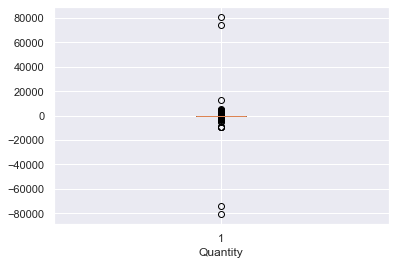

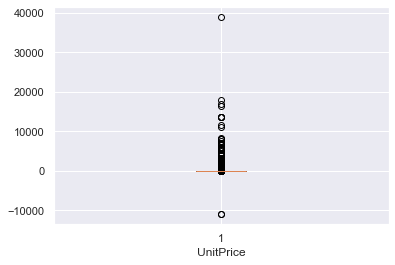

In [4]:
import warnings
warnings.filterwarnings('ignore')

sns.set()
plt.boxplot(data.Quantity)
plt.xlabel('Quantity')
plt.show()
plt.boxplot(data.UnitPrice)
plt.xlabel('UnitPrice')
plt.show()

### b. Histogram – All Numeric Variables

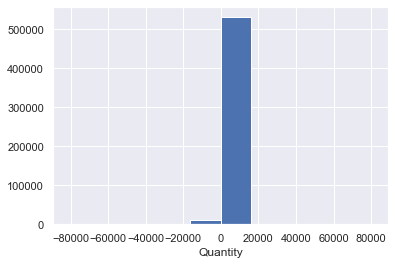

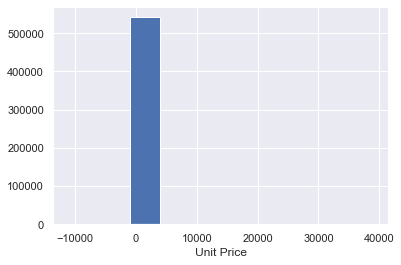

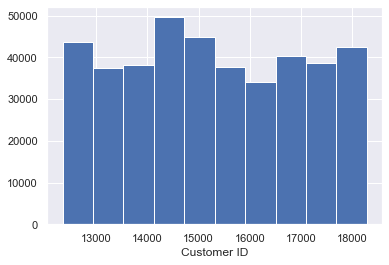

In [5]:
sns.set()
plt.hist(data.Quantity)
plt.xlabel('Quantity')
plt.show()
plt.hist(data.UnitPrice)
plt.xlabel('Unit Price')
plt.show()
plt.hist(data.CustomerID)
plt.xlabel('Customer ID')
plt.show()

### c. Distribution Plot – All Numeric Variables

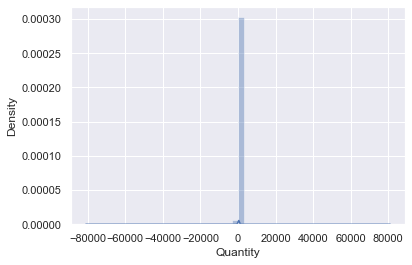

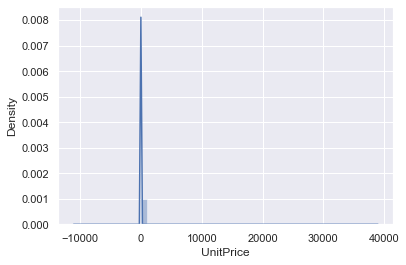

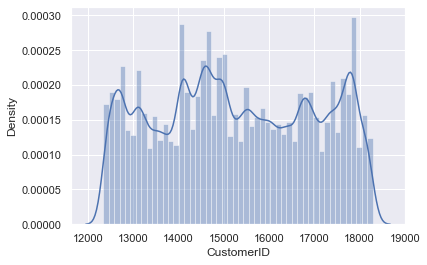

In [6]:
sns.set
sns.distplot(data.Quantity)
plt.xlabel('Quantity')
plt.show()
sns.distplot(data.UnitPrice)
plt.xlabel('UnitPrice')
plt.show()
sns.distplot(data.CustomerID)
plt.xlabel('CustomerID')
plt.show()

### d. Aggregation for all numerical Columns

In [7]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### e. Unique Values across all columns

In [8]:
pd.unique(data[['InvoiceNo','StockCode','Description','Quantity','InvoiceDate','UnitPrice','CustomerID','Country']].values.ravel())

array(['536365', '85123A', 'WHITE HANGING HEART T-LIGHT HOLDER', ...,
       '12/9/2011 12:49', '581587', '12/9/2011 12:50'], dtype=object)

### f. Duplicate values across all columns

In [9]:
data.duplicated(subset=['InvoiceNo','StockCode','Description','Quantity','InvoiceDate','UnitPrice','CustomerID','Country'])

0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Length: 541909, dtype: bool

In [10]:
data.duplicated(subset=['InvoiceNo','StockCode','Description','Quantity','InvoiceDate','UnitPrice','CustomerID','Country']).sum()

5268

### g. Correlation – Heatmap - All Numeric Variables

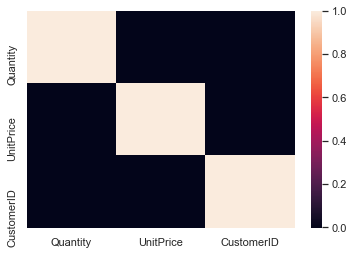

In [11]:
sns.heatmap(data.corr())
plt.show()

### h. Regression Plot - All Numeric Variables

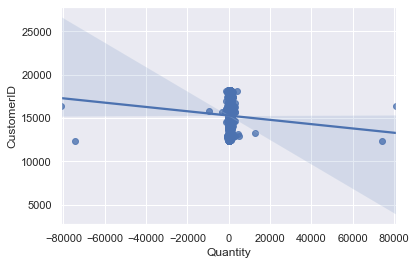

In [12]:
sns.regplot(x="Quantity", y="CustomerID", data=data)
plt.show()

### i. Bar Plot – Every Categorical Variable vs every Numerical Variable

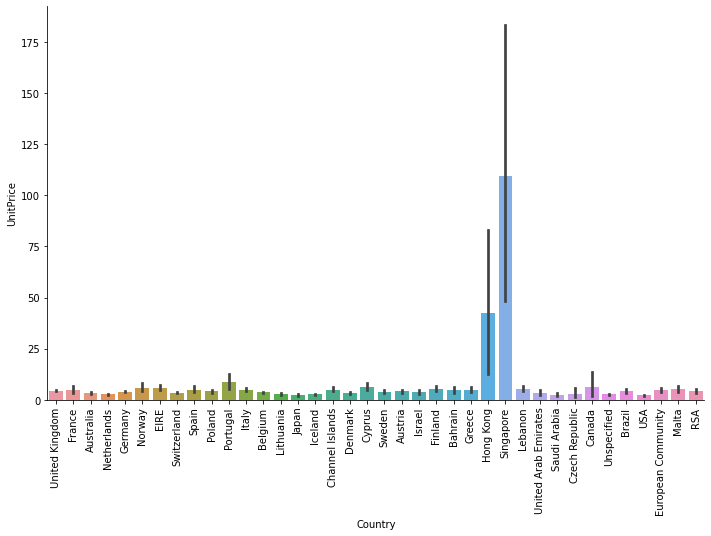

In [40]:
sns.catplot(x="Country", y="UnitPrice", kind="bar", data=data, height=6, aspect=10/6)
plt.xticks(rotation=90)
plt.show()

### j. Pair plot - All Numeric Variables

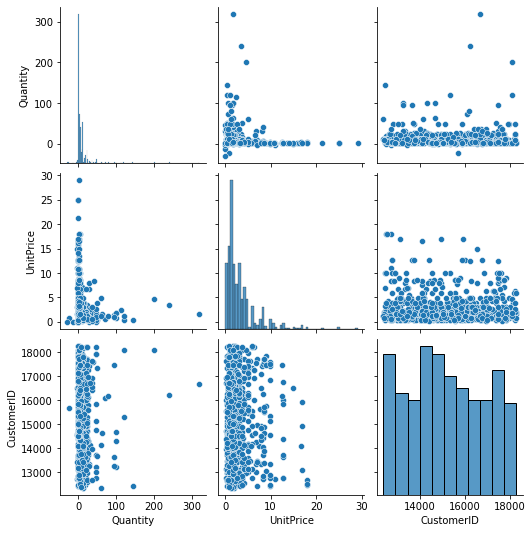

In [3]:
sns.pairplot(data.sample(1000))
plt.show()

### k. Line chart to show the trend of data - All Numeric/Date Variables

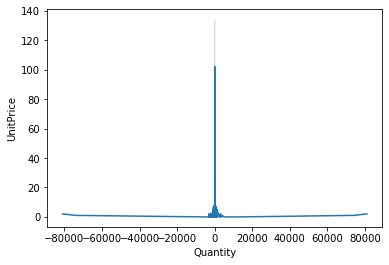

In [9]:
sns.lineplot(data=data, x='Quantity', y='UnitPrice')
plt.show()

### l. Plot the skewness - All Numeric Variables

In [10]:
data.skew(axis=0,skipna=True)

Quantity       -0.264076
UnitPrice     186.506972
CustomerID      0.029835
dtype: float64

In [11]:
data.skew(axis=1,skipna=True)

0         1.732051
1         1.732051
2         1.732050
3         1.732051
4         1.732051
            ...   
541904    1.732046
541905    1.732050
541906    1.732051
541907    1.732051
541908    1.732051
Length: 541909, dtype: float64

## 2. Check for missing values in all columns and replace them with the appropriate metric (Mean/Median/Mode)

In [12]:
print('Missing Values :-\n{}'.format(data.isnull().sum()))

Missing Values :-
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [17]:
data1=data.dropna(subset=['Description','CustomerID'])
print(f"Missing Values :\n{data1.isnull().sum()}")

Missing Values :
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [18]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


## 3. Remove duplicate rows

In [20]:
data1.drop_duplicates()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


## 4. Remove rows which have negative values in Quantity column

In [21]:
data2 = data1[(data1['Quantity'] >= 0)]

In [22]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397924 non-null  object 
 1   StockCode    397924 non-null  object 
 2   Description  397924 non-null  object 
 3   Quantity     397924 non-null  int64  
 4   InvoiceDate  397924 non-null  object 
 5   UnitPrice    397924 non-null  float64
 6   CustomerID   397924 non-null  float64
 7   Country      397924 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


## 5. Add the columns - Month, Day and Hour for the invoice

In [24]:
data2['InvoiceDate'] = data2['InvoiceDate'].astype('datetime64[ns]')
data2['Month'] = data2.InvoiceDate.dt.month
data2['Day']=(data2.InvoiceDate.dt.dayofweek)+1 # +1 to make Monday=1.....until Sunday=7
data2['Hour'] = data2.InvoiceDate.dt.hour
data2.head()

<ipython-input-24-5ed622cfb79f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['InvoiceDate'] = data2['InvoiceDate'].astype('datetime64[ns]')
<ipython-input-24-5ed622cfb79f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Month'] = data2.InvoiceDate.dt.month
<ipython-input-24-5ed622cfb79f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,3,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,3,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,3,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,3,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,3,8


## 6. How many orders made by the customers?

In [25]:
index = pd.Index(data2['Quantity'])
print(f"Total orders made by the customers = {index.value_counts().sum()}")

Total orders made by the customers = 397924


In [26]:
total_order=data2.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count().head(10)
print(total_order)

   CustomerID         Country  InvoiceNo
0     12346.0  United Kingdom          1
1     12347.0         Iceland        182
2     12348.0         Finland         31
3     12349.0           Italy         73
4     12350.0          Norway         17
5     12352.0          Norway         85
6     12353.0         Bahrain          4
7     12354.0           Spain         58
8     12355.0         Bahrain         13
9     12356.0        Portugal         59


## 7. TOP 5 customers with higher number of orders

In [27]:
total_order.sort_values(by='InvoiceNo', ascending=False).head()

,CustomerID,Country,InvoiceNo
1,12347.0,Iceland,182
5,12352.0,Norway,85
3,12349.0,Italy,73
9,12356.0,Portugal,59
7,12354.0,Spain,58


## 8. How much money spent by the customers?

In [29]:
money_spent = data2.groupby(by=['CustomerID','Country'], as_index=False)['UnitPrice'].sum()
print(money_spent)

      CustomerID         Country  UnitPrice
0        12346.0  United Kingdom       1.04
1        12347.0         Iceland     481.21
2        12348.0         Finland     178.71
3        12349.0           Italy     605.10
4        12350.0          Norway      65.30
...          ...             ...        ...
4342     18280.0  United Kingdom      47.65
4343     18281.0  United Kingdom      39.36
4344     18282.0  United Kingdom      62.39
4345     18283.0  United Kingdom    1220.93
4346     18287.0  United Kingdom     104.55

[4347 rows x 3 columns]


## 9. TOP 5 customers with highest money spent

In [30]:
money_spent.sort_values(by='UnitPrice', ascending=False).head()

,CustomerID,Country,UnitPrice
1298,14096.0,United Kingdom,33332.45
1888,14911.0,EIRE,26185.72
4019,17841.0,United Kingdom,19848.49
332,12744.0,Singapore,12949.99
334,12748.0,United Kingdom,12205.60


## 10. How many orders per month?

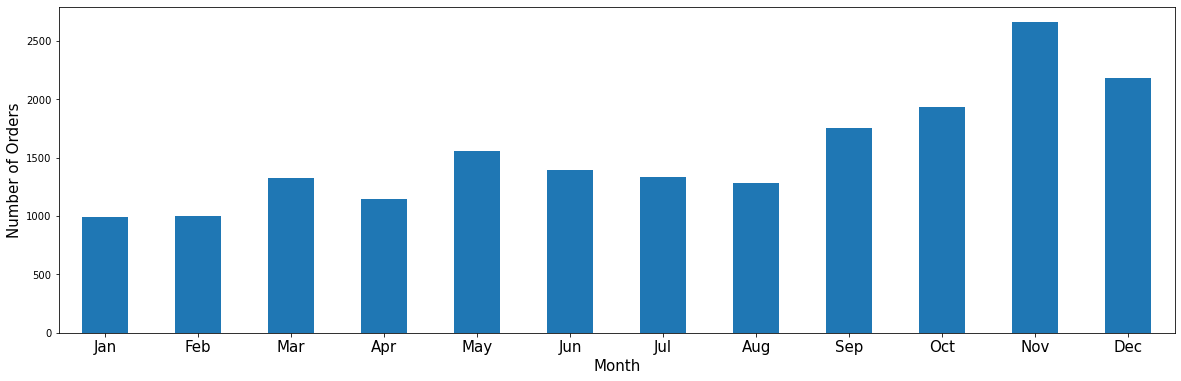

In [38]:
OPM = data2.groupby('InvoiceNo')['Month'].unique().value_counts().sort_index().plot(kind='bar',color=color[0],figsize=(20,6))
OPM.set_xlabel('Month',fontsize=15)
OPM.set_ylabel('Number of Orders',fontsize=15)
OPM.set_xticklabels(('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), rotation='horizontal', fontsize=15)
plt.show()

## 11. How many orders per day?

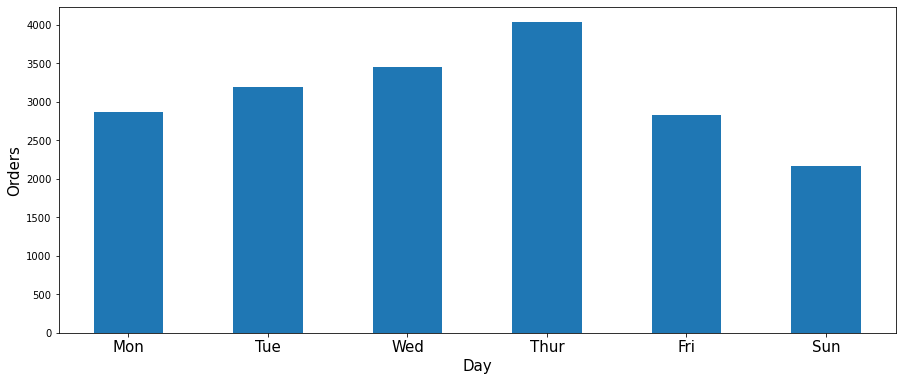

In [42]:
OPD = data2.groupby('InvoiceNo')['Day'].unique().value_counts().sort_index().plot(kind='bar',color=color[0],figsize=(15,6))
OPD.set_xlabel('Day',fontsize=15)
OPD.set_ylabel('Orders',fontsize=15)
OPD.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=15)
plt.show()

## 12. How many orders per hour?

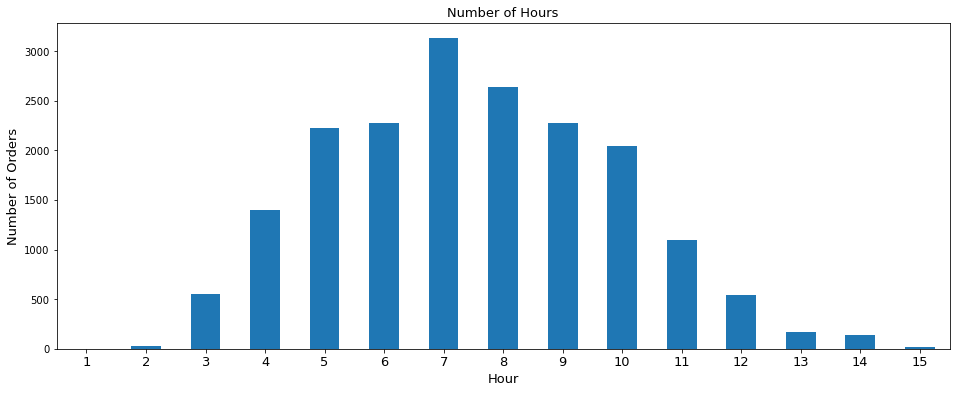

In [51]:
OPH = data2.groupby('InvoiceNo')['Hour'].unique().value_counts().iloc[:-1].sort_index().plot(kind='bar',color=color[0],figsize=(16,6))
OPH.set_xlabel('Hour',fontsize=13)
OPH.set_ylabel('Number of Orders',fontsize=13)
OPH.set_title('Number of Hours',fontsize=13)
OPH.set_xticklabels(range(1,16), rotation='horizontal', fontsize=13)
plt.show()

## 13. How many orders for each country?

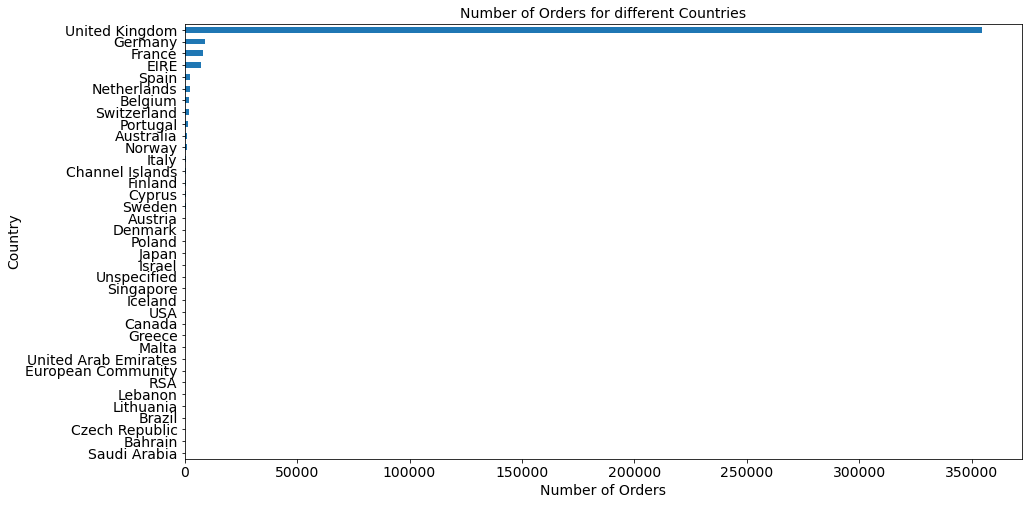

In [52]:
group_country_orders = data2.groupby('Country')['InvoiceNo'].count().sort_values()
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh', fontsize=14, color=color[0])
plt.xlabel('Number of Orders', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.title('Number of Orders for different Countries', fontsize=14)
plt.show()

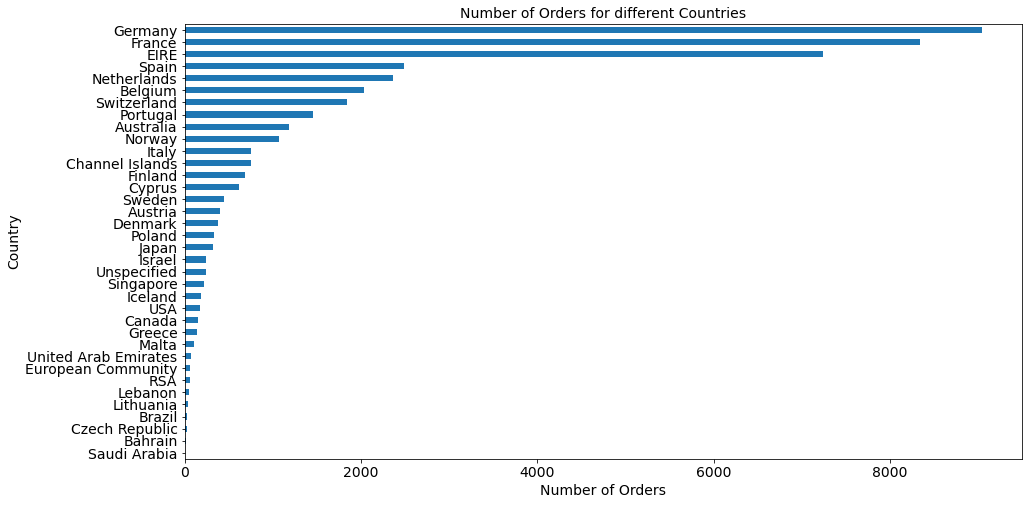

In [53]:
group_country_orders = data2.groupby('Country')['InvoiceNo'].count().sort_values()
del group_country_orders['United Kingdom']

# number of unique customers in each country (without UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh', fontsize=14, color=color[0])
plt.xlabel('Number of Orders', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.title('Number of Orders for different Countries', fontsize=14)
plt.show()

## 14. Orders trend across months

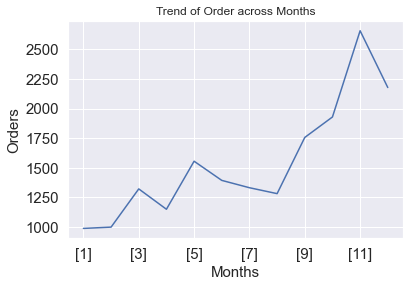

In [61]:
sns.set()
ord_mon=data2.groupby('InvoiceNo')['Month'].unique().value_counts().sort_index()
ord_mon.plot(kind="line",title="Trend of Order across Months",fontsize=15)
plt.xlabel("Months",fontsize=15)
plt.ylabel("Orders",fontsize=15)
plt.show()

## 15. How much money spent by each country?

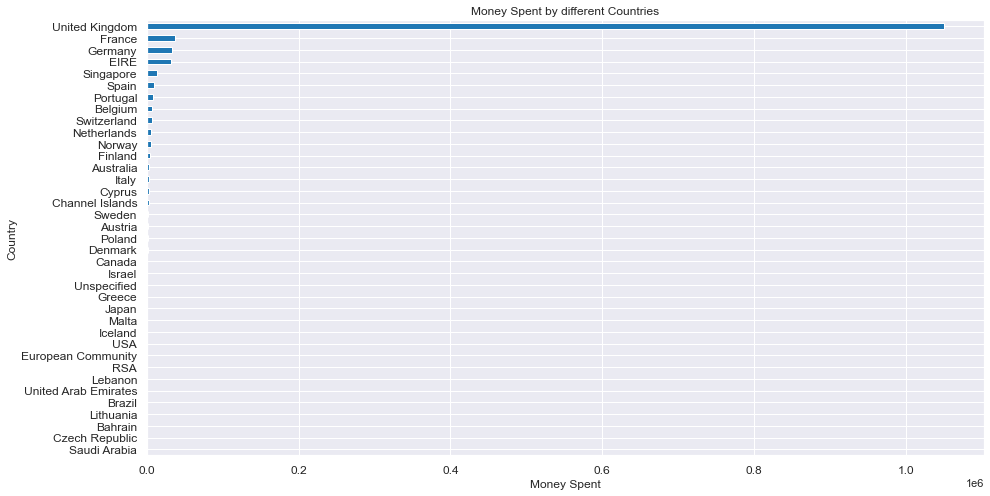

In [65]:
group_country_amount_spent = data2.groupby('Country')['UnitPrice'].sum().sort_values()
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Money Spent', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

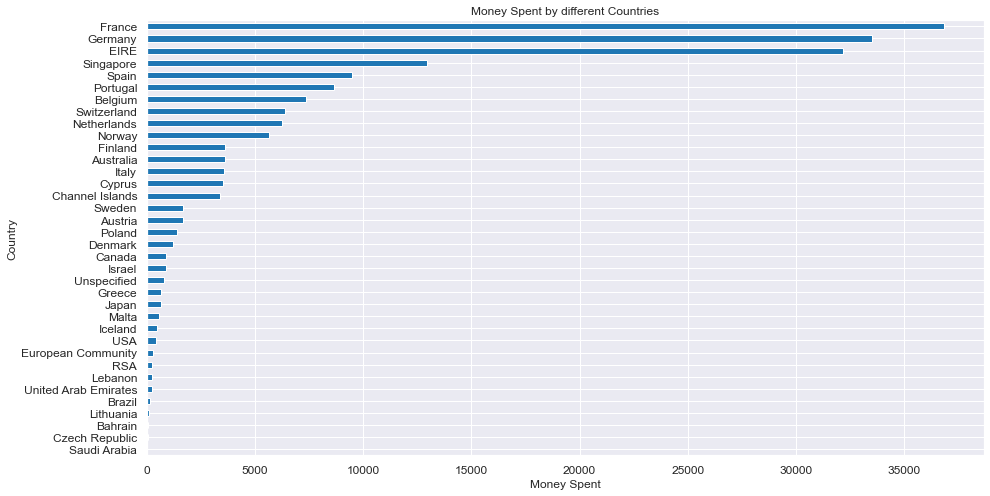

In [66]:
group_country_amount_spent = data2.groupby('Country')['UnitPrice'].sum().sort_values()
del group_country_amount_spent['United Kingdom']

# plot total money spent by each country (without UK)
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Money Spent', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()